In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

dataset='HashMapUsage.csv'
figsize=(12,6)

df = pd.read_csv('../datasets/' + dataset)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 9 columns):
EGAP(s)                                4250 non-null object
# EGAPs 'HashMapUsage' fixed           4250 non-null int64
# Hits on 'HashMapUsage' fixed code    4250 non-null int64
Energy (before fix)                    4250 non-null float64
Energy (after fix)                     4250 non-null float64
Time (before fix)                      4250 non-null float64
Time (after fix)                       4250 non-null float64
# Total method calls                   4250 non-null int64
# Diff. method calls                   4250 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 298.9+ KB


Descrever colunas

In [2]:
cols = ['egaps_fixed', 'hits', 'energy_before', 'energy_after',
              'time_before', 'time_after', 'total_calls', 'diff_calls']

df = df.drop([df.columns[0]], axis=1)
df.columns = cols

In [3]:
def downcast_dtypes(df):
    df_int = df.select_dtypes(include=['int'])
    df_int = df_int.apply(pd.to_numeric, downcast='unsigned')
    df[df_int.columns] = df_int

    df_float = df.select_dtypes(include=['float'])
    df_float = df_float.apply(pd.to_numeric, downcast='float')
    df[df_float.columns] = df_float
    
    return df

df = downcast_dtypes(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 8 columns):
egaps_fixed      4250 non-null uint8
hits             4250 non-null uint8
energy_before    4250 non-null float32
energy_after     4250 non-null float32
time_before      4250 non-null float32
time_after       4250 non-null float32
total_calls      4250 non-null uint16
diff_calls       4250 non-null uint8
dtypes: float32(4), uint16(1), uint8(3)
memory usage: 87.2 KB


In [4]:
df.sample(10)

,egaps_fixed,hits,energy_before,energy_after,time_before,time_after,total_calls,diff_calls
708,1,1,24922.099609,49122.0,21610.650391,49272.0,964,66
3449,1,1,22692.531250,42263.0,22628.775391,42245.0,2229,200
2435,4,4,21172.398438,41571.0,14202.495117,42861.0,128,17
4161,1,0,21900.121094,40114.0,22413.763672,40160.0,652,55
155,2,1,22455.460938,40578.0,20519.240234,40096.0,32,28
489,1,1,23918.279297,60016.0,27931.013672,59718.0,32,20
1556,2,0,22189.183594,41593.0,22041.035156,41609.0,4,4
293,7,0,22245.128906,40209.0,22235.191406,40198.0,12,8
3443,1,1,21820.261719,42117.0,21551.904297,42107.0,2229,200
2241,2,0,35753.992188,60436.0,36269.648438,60125.0,12,8


In [5]:
df.describe()

,egaps_fixed,hits,energy_before,energy_after,time_before,time_after,total_calls,diff_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,2.235294,3.094118,21839.968750,41407.070312,22033.843750,41348.367188,255.047059,34.964706
std,2.001100,22.828947,5909.528320,14028.019531,5917.444824,14046.823242,584.327523,41.374634
min,1.000000,0.000000,7272.112793,5017.000000,7561.808594,5016.000000,0.000000,0.000000
25%,1.000000,0.000000,19250.818848,40358.500000,19123.173828,40291.000000,11.000000,8.000000
50%,1.000000,1.000000,22269.961914,42983.500000,22322.458008,42955.000000,41.000000,22.500000
75%,2.000000,1.000000,25275.001465,49280.750000,25390.467285,49187.000000,210.000000,47.000000
max,8.000000,243.000000,54800.707031,61372.000000,65840.539062,61231.000000,4251.000000,219.000000


In [6]:
def group_rows(df, as_index=False, step=25):
    agg_cols = ['egaps_fixed', 'hits', 'total_calls', 'diff_calls']
    gf = pd.DataFrame()
    for i in range(0, df.shape[0], step):
        row = df.iloc[i:i+step].groupby(agg_cols, as_index=False).mean()
        gf = gf.append(row, ignore_index=True)

    return gf

gf = group_rows(df)
gf.head()

,egaps_fixed,hits,total_calls,diff_calls,energy_before,energy_after,time_before,time_after
0,2,0,7,5,22287.970703,43118.398438,22218.509766,43191.800781
1,2,0,8,6,22201.689453,40269.800781,22117.703125,40210.921875
2,2,0,7,5,21478.400391,41613.839844,21410.601562,41631.441406
3,2,0,7,5,25800.894531,49166.121094,25319.830078,49117.238281
4,2,0,8,6,28846.345703,59634.800781,29057.417969,59638.398438


In [7]:
gf.shape[0]

170

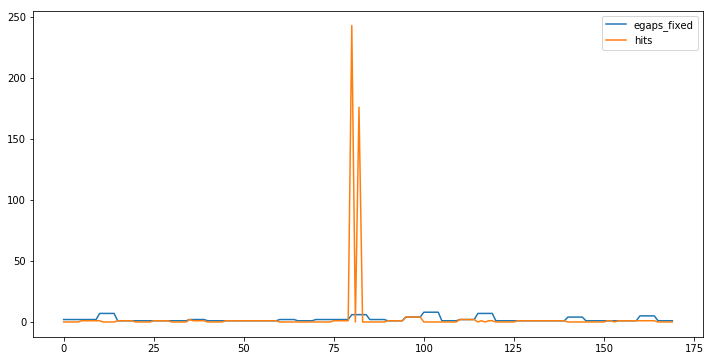

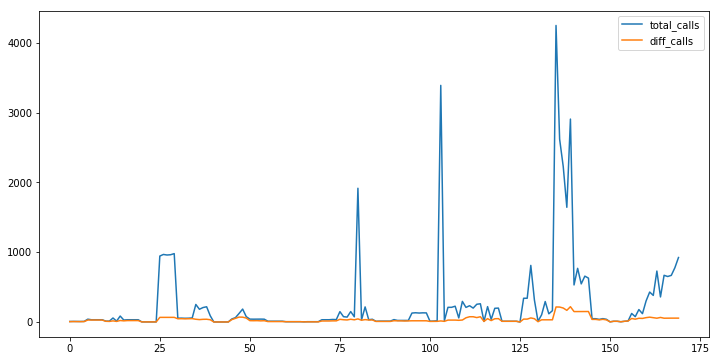

In [8]:
gf[['egaps_fixed', 'hits']].plot(figsize=figsize)
gf[['total_calls', 'diff_calls']].plot(figsize=figsize)

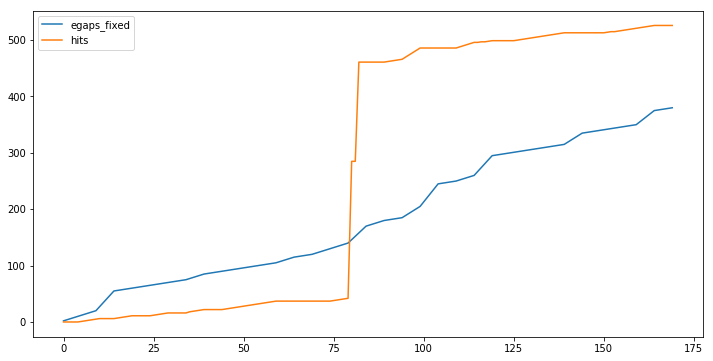

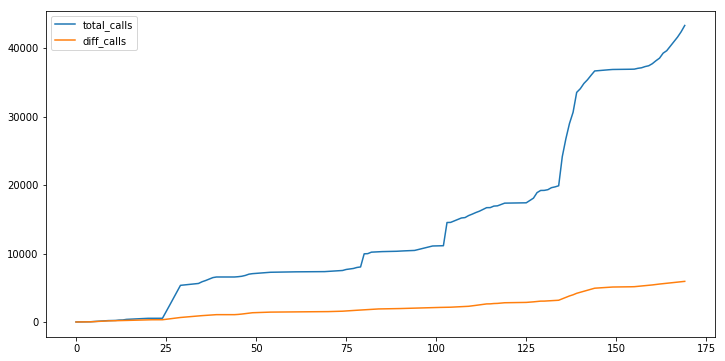

In [9]:
gl = gf[['egaps_fixed', 'hits']].copy()
gl.cumsum().plot(figsize=figsize)
gl = gf[['total_calls', 'diff_calls']].copy()
gl.cumsum().plot(figsize=figsize)

In [10]:
gf['egaps_fixed'].value_counts()

1    95
2    40
7    10
4    10
8     5
6     5
5     5
Name: egaps_fixed, dtype: int64

In [11]:
gf['hits'].value_counts()

0      82
1      75
2       6
4       5
243     1
176     1
Name: hits, dtype: int64

In [12]:
gf['energy_diff'] = gf['energy_before'] > gf['energy_after']
gf['time_diff'] = gf['time_before'] > gf['time_after']
gf['energy_pct'] = gf['energy_after'] * 100 / gf['energy_before']
gf['time_pct'] = gf['time_after'] * 100 / gf['time_before']
gf.sample(10)

,egaps_fixed,hits,total_calls,diff_calls,energy_before,energy_after,time_before,time_after,energy_diff,time_diff,energy_pct,time_pct
41,1,0,0,0,8447.879883,5324.759766,8343.025391,5307.040039,True,True,63.030727,63.610497
141,4,0,769,149,28095.804688,40406.281250,28746.556641,40418.761719,False,False,143.816055,140.603836
147,1,0,37,30,23221.185547,41645.281250,23474.855469,41712.398438,False,False,179.341751,177.689682
101,8,0,13,9,17854.054688,40528.238281,18706.023438,40461.601562,False,False,226.997391,216.302536
80,6,243,1917,44,26924.501953,43201.640625,26934.716797,43198.718750,False,False,160.454742,160.383041
97,4,4,128,17,21269.986328,41621.960938,14373.010742,42840.679688,False,False,195.684006,298.063354
50,1,1,41,19,20791.429688,43039.800781,21048.691406,43082.320312,False,False,207.007416,204.679321
68,1,0,4,2,9101.411133,10361.959961,9105.270508,10332.000000,False,False,113.850037,113.472740
20,1,0,1,1,10462.137695,8001.399902,10400.950195,7914.919922,True,True,76.479591,76.098045
74,2,0,34,16,32524.617188,59755.398438,31860.173828,59745.238281,False,False,183.723602,187.523270


In [13]:
gf['energy_diff'].value_counts()

False    154
True      16
Name: energy_diff, dtype: int64

In [14]:
gf_filter = gf[gf['energy_diff'] == True]
gf_filter.sample(10)

,egaps_fixed,hits,total_calls,diff_calls,energy_before,energy_after,time_before,time_after,energy_diff,time_diff,energy_pct,time_pct
76,2,1,76,32,11133.354492,8561.080078,11222.113281,8556.080078,True,True,76.895782,76.243034
44,1,0,0,0,8329.826172,5302.000000,8304.489258,5299.479980,True,True,63.650787,63.814640
20,1,0,1,1,10462.137695,8001.399902,10400.950195,7914.919922,True,True,76.479591,76.098045
40,1,0,0,0,8320.315430,5324.879883,8260.645508,5267.680176,True,True,63.998535,63.768383
78,2,1,149,39,12401.242188,8060.359863,12278.242188,8071.759766,True,True,64.996391,65.740356
23,1,0,1,1,10489.382812,7959.479980,10362.825195,7966.919922,True,True,75.881302,76.879807
43,1,0,0,0,8327.339844,5278.640137,8341.648438,5313.680176,True,True,63.389271,63.700600
93,1,1,23,14,31943.080078,13638.959961,32030.296875,12894.160156,True,True,42.697697,40.256138
77,2,1,70,29,12002.750000,9604.719727,12255.246094,9579.240234,True,True,80.020996,78.164406
42,1,0,0,0,8316.539062,5282.839844,8291.890625,5345.479980,True,True,63.522099,64.466362


In [15]:
gf_filter['energy_pct'].mean()

69.48444366455078

In [16]:
gf['time_diff'].value_counts()

False    154
True      16
Name: time_diff, dtype: int64

In [17]:
gf_filter = gf[gf['time_diff'] == True]
gf_filter.sample(10)

,egaps_fixed,hits,total_calls,diff_calls,energy_before,energy_after,time_before,time_after,energy_diff,time_diff,energy_pct,time_pct
41,1,0,0,0,8447.879883,5324.759766,8343.025391,5307.040039,True,True,63.030727,63.610497
93,1,1,23,14,31943.080078,13638.959961,32030.296875,12894.160156,True,True,42.697697,40.256138
75,2,1,148,38,13566.819336,8076.359863,13416.117188,8091.759766,True,True,59.530239,60.313725
79,2,1,74,31,12772.822266,9536.200195,13105.578125,9596.519531,True,True,74.660088,73.224693
40,1,0,0,0,8320.315430,5324.879883,8260.645508,5267.680176,True,True,63.998535,63.768383
20,1,0,1,1,10462.137695,8001.399902,10400.950195,7914.919922,True,True,76.479591,76.098045
21,1,0,1,1,10737.307617,8473.040039,10796.961914,8430.160156,True,True,78.912148,78.079002
43,1,0,0,0,8327.339844,5278.640137,8341.648438,5313.680176,True,True,63.389271,63.700600
42,1,0,0,0,8316.539062,5282.839844,8291.890625,5345.479980,True,True,63.522099,64.466362
76,2,1,76,32,11133.354492,8561.080078,11222.113281,8556.080078,True,True,76.895782,76.243034


In [18]:
gf_filter['time_pct'].mean()

69.25321960449219

In [19]:
gf_filter = gf[gf['energy_diff'] == False]
gf_filter.sample(10)

,egaps_fixed,hits,total_calls,diff_calls,energy_before,energy_after,time_before,time_after,energy_diff,time_diff,energy_pct,time_pct
50,1,1,41,19,20791.429688,43039.800781,21048.691406,43082.320312,False,False,207.007416,204.679321
110,2,2,209,60,22766.792969,44197.878906,21336.701172,44476.238281,False,False,194.133102,208.449463
10,7,1,12,10,23394.808594,43144.960938,23065.923828,43153.601562,False,False,184.421082,187.088104
27,1,1,960,66,22271.636719,41651.558594,22321.958984,41639.601562,False,False,187.016144,186.540985
84,6,0,39,29,35153.582031,59784.000000,34555.210938,59762.039062,False,False,170.065170,172.946533
90,1,1,34,18,22756.931641,43204.359375,22727.291016,43135.640625,False,False,189.851425,189.796661
73,2,0,36,16,31869.886719,50212.601562,36218.644531,49881.039062,False,False,157.554993,137.722000
45,1,1,43,34,19465.292969,43485.718750,22776.902344,43111.199219,False,False,223.401306,189.275955
147,1,0,37,30,23221.185547,41645.281250,23474.855469,41712.398438,False,False,179.341751,177.689682
34,1,0,58,48,26036.941406,60135.601562,31651.230469,59810.679688,False,False,230.962616,188.967941


In [ ]:
gf_filter['energy_pct'].mean()